<a href="https://colab.research.google.com/github/hamchick/Bitcoin-Price-Forecast-Using-Echo-State-Network/blob/main/ESNonly_acc_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, ElasticNetCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
import time
from sklearn.preprocessing import RobustScaler

from google.colab import drive

drive.mount('/content/drive')

# data needed
real_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Data/Mydata.csv')
real_data_original = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Data/Mydata_original.csv')
real_data_log = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Data/Mydata_log.csv')
mydf_log_withdate = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Data 2/mydf_log_withdate.csv')
real_data_log_withdate = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Data 2/real_data_log_withdate.csv')


mydf5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Data 2/mypred log bestacc alpha-89_morepara.csv')

mydfLo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks Data 2/mypred_acc_psLo.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
real_data_original = real_data_original['Open']
real_data_log = real_data_log['Open']
real_data_log_withdate.columns = ['Datetime','1','real']
dateframe = pd.DataFrame(real_data_log_withdate['Datetime'])


mydf5 = mydf5['0']
mydfLo = mydfLo['0']

In [ ]:
data_old = real_data_log
data_updown = []
for c in range(data_old.size-1):
  if (data_old[c+1] > data_old[c]):
    data_updown.append(1)
  else:
    data_updown.append(0)
data_updown = pd.DataFrame(data_updown)
data_updownT = data_updown.loc[3101:3200]

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
pd.DataFrame(mydfLo)

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
pd.DataFrame(data_updownT)

,0
3101,0
3102,1
3103,0
3104,0
3105,1
3106,0
3107,1
3108,0
3109,1
3110,0


In [ ]:
def updown_count(boo, booTrue):
  myp = boo
  true = booTrue
  updown = np.zeros(100)

  updown = np.zeros(100)
  for c in range(len(myp)-1):
    if (((myp[c+1]-myp[c]>0) &(true[c+1]-true[c]>0))|((myp[c+1]-myp[c]<0) &(true[c+1]-true[c]<0))):
      updown[c] = 1
  updown
  print('overall acc = '+ str(list(updown).count(1)))

  updown = np.zeros(100)
  for c in range(len(myp)-1):
    if ((true[c+1]-true[c]>0)):
      updown[c] = 1
  updown
  print('upTrue = '+ str(list(updown).count(1)))

  updown = np.zeros(100)
  for c in range(len(myp)-1):
    if ((true[c+1]-true[c] < 0)):
      updown[c] = 1
  updown
  print('downTrue = '+ str(list(updown).count(1)))

  updown = np.zeros(100)
  for c in range(len(myp)-1):
    if ((true[c+1]-true[c]>0)&(myp[c+1]-myp[c]>0)):
      updown[c] = 1
  updown
  print('correct up predict = '+ str(list(updown).count(1)))

  updown = np.zeros(100)
  for c in range(len(myp)-1):
    if ((true[c+1]-true[c]<0)&(myp[c+1]-myp[c]<0)):
      updown[c] = 1
  updown
  print('correct down predict = '+ str(list(updown).count(1)))

In [ ]:
def plot_diff(myseries, trueseries, savename = 0,Lname = 0):
  real_data_original = trueseries
  boo = pd.concat([pd.Series(real_data_original[3200]), myseries])
  booTrue = real_data_original[3200:3301]
  
  boo = boo.reset_index()
  boo = boo[0]
  booTrue = booTrue.reset_index()
  booTrue = booTrue['Open']

  bo = np.zeros(100)

  for c in range(len(boo)-1):
    if (((boo[c+1]-boo[c]>0) &(booTrue[c+1]-booTrue[c]>0))|((boo[c+1]-boo[c]<0) &(booTrue[c+1]-booTrue[c]<0))):
      bo[c] = 1
  print('acc = '+ str(list(bo).count(1)))

  updown_count(boo,booTrue)

  boo = boo.diff()
  boo = boo.dropna()
  boo = pd.DataFrame(boo)
  boo.columns = ['my']
  boo = boo.set_index(pd.DatetimeIndex(dateframe['Datetime']))
  booTrue = booTrue.diff()
  booTrue = booTrue.dropna()
  booTrue = pd.DataFrame(booTrue)
  booTrue.columns = ['real']
  booTrue = booTrue.set_index(pd.DatetimeIndex(dateframe['Datetime']))

  from datetime import datetime
  import matplotlib.pyplot as plt

  fig, ax = plt.subplots()

  plt.rcParams["figure.figsize"] = (12, 8)
  #plt.title(savename)
  plt.plot(booTrue,label='real')
  if Lname != 0:
    plt.plot(boo,label= Lname)
  else:
    plt.plot(boo,label= 'my' ,fontsize=16)
  plt.axhline(y = 0,color = "r",linestyle = ":")
  plt.ylim(-1.1,1.1) ###

  ax.annotate('good pred', xy=(datetime(2020, 11, 19), 0.075),
            fontsize= 13,
            xytext=(15, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>')
            )

  ax.annotate('good pred', xy=(datetime(2020, 12, 29), 0.075),
            fontsize= 13,
            xytext=(-60, 15), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>')
            )

  for i in range(100):
    if bo[i] ==1:
      if i == 0:
        ax.axvspan(datetime.strptime(("2020-10-09-12-0"), "%Y-%m-%d-%H-%M"), datetime.strptime((dateframe.loc[i].item()+"-11-59"), "%Y-%m-%d-%H-%M"), color="blue", alpha=0.15)
      else:
        ax.axvspan(datetime.strptime((dateframe.loc[i-1].item()+"-12-0"), "%Y-%m-%d-%H-%M"), datetime.strptime((dateframe.loc[i].item()+"-11-59"), "%Y-%m-%d-%H-%M"), color="blue", alpha=0.15)

  leg = ax.legend(prop={"size":16})
  fig.autofmt_xdate()
  if savename != 0:
    path = '/content/drive/MyDrive/Colab Notebooks Picture AutoARIMA/'
    path = path + savename + ".png"
    plt.savefig(path,bbox_inches='tight')

  plt.show()

In [ ]:
plot_diff(mydfLo,data_updownT,'ESN LO',"ESN LO")

acc = 68
overall acc = 68
upTrue = 66
downTrue = 34
correct up predict = 56
correct down predict = 12


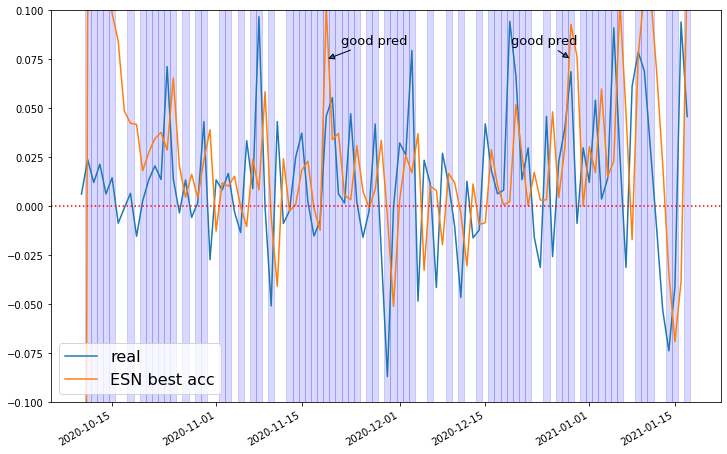

In [ ]:
plot_diff(mydf5,real_data_log,'ESN best accuracy',"ESN best acc")